In [3]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install scikit-learn

In [4]:
import importlib.util, sys, os
spec = importlib.util.find_spec("pandas")
print("cwd:", os.getcwd())
print("pandas spec:", spec)
print("origin:", getattr(spec, "origin", None))
print("search locations:", getattr(spec, "submodule_search_locations", None))
print("first sys.path entries:", sys.path[:5])

cwd: /Users/tanya/Desktop/~:coops:readmission
pandas spec: ModuleSpec(name='pandas', loader=<_frozen_importlib_external.SourceFileLoader object at 0x10c2be1e0>, origin='/Users/tanya/coops/readmission/.venv/lib/python3.12/site-packages/pandas/__init__.py', submodule_search_locations=['/Users/tanya/coops/readmission/.venv/lib/python3.12/site-packages/pandas'])
origin: /Users/tanya/coops/readmission/.venv/lib/python3.12/site-packages/pandas/__init__.py
search locations: ['/Users/tanya/coops/readmission/.venv/lib/python3.12/site-packages/pandas']
first sys.path entries: ['/Library/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/tanya/coops/readmission/.venv/lib/python3.12/site-packages']


In [5]:
import pandas as pd
print(pd.__version__)

2.3.3


In [6]:
from sklearn.neighbors import KNeighborsClassifier
print("KNN ready")

KNN ready


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


X = pd.read_csv("data/X_discharge_v1.csv")
y = pd.read_csv("data/y_readmit30_v1.csv")

print("X shape:", X.shape)
print("y shape:", y.shape)

display(X.head())
display(y.head())

X shape: (101766, 41)
y shape: (101766, 1)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),6,25,1,1,Missing,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),1,1,7,3,Missing,Missing,59,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,Missing,Missing,11,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,Missing,Missing,44,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,Missing,Missing,51,...,No,No,Steady,No,No,No,No,No,Ch,Yes


,readmit_30
0,0
1,0
2,0
3,0
4,0


In [8]:
# X still has categorical strings (race, gender, age as bins, payer_code, medical_specialty, examide “No/Yes”, etc.). 
# KNN in scikit-learn needs all-numeric features.

X.dtypes.value_counts()
X.isna().sum().sort_values(ascending=False).head(10) # shows 10 most missing columns

race             2273
acetohexamide       0
glyburide           0
tolbutamide         0
pioglitazone        0
rosiglitazone       0
acarbose            0
miglitol            0
troglitazone        0
tolazamide          0
dtype: int64

In [9]:
X["race"] = X["race"].fillna("Unknown")
X["race"].isna().sum()

np.int64(0)

In [10]:
y_vec = y["readmit_30"]
y_vec.value_counts(dropna=False)


# KNN will likely vote majority no readmission. we will focus not on accuracy, but on minimizing false alarms and predicting if someone is going to get readmitted 

readmit_30
0    90409
1    11357
Name: count, dtype: int64

In [11]:
y_vec = y["readmit_30"].astype(int)
y_vec


0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmit_30, Length: 101766, dtype: int64

In [12]:
# identify which cols are categorical 
cat_cols = X.select_dtypes(include=["object"]).columns
cat_cols

Index(['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [13]:
X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=False)
X_enc.shape



(101766, 196)

In [14]:
X_enc.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,True,False,True,False,True,False,False,True,True,False
1,1,1,7,3,59,0,18,0,0,0,...,True,False,True,False,True,False,True,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,True,False,True,False,True,False,False,True,False,True
3,1,1,7,2,44,1,16,0,0,0,...,True,False,True,False,True,False,True,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,True,False,True,False,True,False,True,False,False,True


In [15]:
X_enc.filter(like="race_").head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


In [16]:
# “maximize precision subject to recall ≥ 70%” involves choosing a threshold, validation.
# train: 70%
# validation: 15%. used to decide which k is best, whether weights = distance helps, which prob threshold T gives recall > = 70.
# test: 15% 

# split

# 1) split off test (15%)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_enc, y_vec,
    test_size=0.15,
    random_state=42,
    stratify= y_vec
)

# 2) split train vs val (val is 15% of total -> 0.15/0.85 of trainval)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.15/0.85,
    random_state=42,
    stratify=y_trainval
)

X_train.shape, X_val.shape, X_test.shape

((71236, 196), (15265, 196), (15265, 196))

In [17]:
# Feature filtering (TRAIN ONLY)

# Mutual Information (better for non-linear but linear as well, still train-only)

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
import pandas as pd
import numpy as np

# 1) MI ranking (train only)
mi = mutual_info_classif(X_train, y_train, random_state=42) # mi = a 1D NumPy array of length n_features. estimates how much knowing feature X helps predict whether y=1 vs y=0.
            # “If I know the value of this feature, does that reduce my uncertainty about y?”
                # If the feature behaves differently for y=0 vs y=1 → informative → MI > 0

# “How much knowing this feature reduces uncertainty about readmission?”
mi = pd.Series(mi, index=X_train.columns).sort_values(ascending=False) # converts raw MI array into labeled vector. each MI score is now attached to its feature name. sorts from most informative to least. 
# a ranked list of features by usefulness.  
# tells which number belongs to which feature name, by tracking positions

K_grid = [50, 100, 200, 300, 500, X_train.shape[1]] # fixed K vs all cols.  # keeps the top K most informative features. 
w = 1 # placeholder for no weighting yet

K_results = []

for K in K_grid:
    keep_cols = mi.head(K).index.tolist()

    # 2) apply same columns to train/val
    Xtr = X_train[keep_cols]
    Xva = X_val[keep_cols]

    # 3) scale (fit on train only)
    scaler = StandardScaler()
    Xtr_s = scaler.fit_transform(Xtr)
    Xva_s = scaler.transform(Xva)

    # 4) train + score, by PR-AUC on val, simple baseline logreg model to compare K values
    lr = LogisticRegression(max_iter=2000, class_weight={0: 1, 1: w})
    lr.fit(Xtr_s, y_train)

    va_proba = lr.predict_proba(Xva_s)[:, 1]
    pr = average_precision_score(y_val, va_proba)

    K_results.append((K, pr))

best_K, best_pr = max(K_results, key=lambda x: x[1])
best_K, best_pr, sorted(K_results, key=lambda x: x[1], reverse=True)

(200,
 0.19097574147586624,
 [(200, 0.19097574147586624),
  (300, 0.19097574147586624),
  (500, 0.19097574147586624),
  (196, 0.19097574147586624),
  (50, 0.1908430687704581),
  (100, 0.1904887232651531)])

In [18]:
# choosing the smallest K for simplicity. since K=196,200,300,500 all have the same PR-AUC

K = 196
keep_cols = mi.head(K).index.tolist()

X_train_f = X_train[keep_cols]
X_val_f   = X_val[keep_cols]
X_test_f  = X_test[keep_cols]

In [19]:
import numpy as np

# --- Drop one of any pair of features with abs(corr) > threshold (TRAIN ONLY) ---
threshold = 0.95 # if 2 features are correlated more than 0.95, they are essentially the same signal and keeping both will add noise and instability. 

corr = X_train_f.corr().abs() 	# computes feature–feature correlation matrix. entry (i, j) = correlation between feature i and feature j. is symmetric

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) # (mask) keeps values where mask is True, and makes everything else NaN.
# Keeps only the upper triangle of the correlation matrix
# Prevents double-counting pairs like (A,B) and (B,A)
# Prevents comparing a feature with itself

# columns to drop: any column that has correlation > threshold with something earlier
to_drop = [col for col in upper.columns if any(upper[col] > threshold)] # Drops any feature that is highly correlated (>0.95) with any earlier feature.”

print("Dropping redundant cols:", len(to_drop))
# print(to_drop[:30])  # optional peek

# apply the drop to train/val/test using the SAME columns
X_train_f = X_train_f.drop(columns=to_drop)
X_val_f   = X_val_f.drop(columns=to_drop)
X_test_f  = X_test_f.drop(columns=to_drop)

X_train_f.shape, X_val_f.shape, X_test_f.shape

Dropping redundant cols: 16


((71236, 180), (15265, 180), (15265, 180))

In [20]:
# to see how many columns got removed
print("Before redundancy drop:", X_train[keep_cols].shape[1])
print("After redundancy drop:", X_train_f.shape[1])

Before redundancy drop: 196
After redundancy drop: 180


In [21]:
# fit scaler on train

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_f) # fit ONLY on train
X_val_s   = scaler.transform(X_val_f)
X_test_s  = scaler.transform(X_test_f)

In [22]:
# 1) LogReg

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

weight_grid = [1, 2, 3, 5, 8, 13]
best = None

for w in weight_grid:
    lr = LogisticRegression(max_iter=2000, class_weight={0:1, 1:w})
    lr.fit(X_train_s, y_train)

    y_val_proba = lr.predict_proba(X_val_s)[:, 1]
    pr_auc = average_precision_score(y_val, y_val_proba)

    if (best is None) or (pr_auc > best["pr_auc"]):
        best = {"w": w, "model": lr, "pr_auc": pr_auc}

best

{'w': 13,
 'model': LogisticRegression(class_weight={0: 1, 1: 13}, max_iter=2000),
 'pr_auc': 0.1918235303905126}

In [23]:
best_lr = best["model"]   # weight = 13

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

In [25]:
# predict probabilities

y_val_proba = best_lr.predict_proba(X_val_s)[:, 1]

In [26]:
pr_auc  = average_precision_score(y_val, y_val_proba)
roc_auc = roc_auc_score(y_val, y_val_proba)
pr_auc, roc_auc

(0.1918235303905126, 0.6393829240157833)

In [27]:
# Find the highest threshold that still gives recall ≥ 0.70 
# (minimize false alarms while meeting the recall floor)

from sklearn.metrics import recall_score, precision_score

thresholds = np.linspace(y_val_proba.min(), y_val_proba.max(), 300)

best_t = None
best_prec = -1
best_rec = None

for t in thresholds:
    preds = (y_val_proba >= t).astype(int)
    r = recall_score(y_val, preds, zero_division=0)
    p = precision_score(y_val, preds, zero_division=0)

    if r >= 0.70 and p > best_prec:
        best_prec = p
        best_t = t
        best_rec = r

best_t, best_prec, best_rec

(np.float64(0.5705008883338997), 0.1468685142229276, 0.7064004697592484)

In [28]:
# Inspect confusion matrix at threshold 0.5, 0.3

                    #confusion matrix: 
                    # [ True Neg    False Pos
                    #   False Neg    True pos]

                    # This will answer concretely:
                        # How many patients are flagged?
                        # How many readmissions are missed?
                        # Does recall reach your 70% target?
                        # How bad do false alarms get?

from sklearn.metrics import confusion_matrix, precision_score, recall_score

t = float(best_t)
pred = (y_val_proba >= t).astype(int)
tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()

precision = precision_score(y_val, pred, zero_division=0)
recall    = recall_score(y_val, pred, zero_division=0)
flag_rate = (tp+fp)/len(y_val)

precision, recall, flag_rate, (tn, fp, fn, tp)


(0.1468685142229276,
 0.7064004697592484,
 np.float64(0.5365869636423191),
 (np.int64(6574), np.int64(6988), np.int64(500), np.int64(1203)))

In [29]:
# 2) KNN (oversampling)

import numpy as np

def oversample_positive(X, y, pos_mult=1, seed=42):
    if pos_mult <= 1:
        return X, y
    rng = np.random.default_rng(seed) # creates a random number generator using the given seed. default_rng is modern NumPy style and reproducible.
    # “pick some positive rows at random and duplicate them.” 
    y = np.asarray(y) # makes sure y is a NumPy array
    X = np.asarray(X) 
    pos_idx = np.where(y == 1)[0] # finds indices of all pos examples (readmitted =1). np.where returns a tuple, [0], and extracts index array.
    if len(pos_idx) == 0:
        return X, y
    extra = rng.choice(pos_idx, size=(pos_mult - 1) * len(pos_idx), replace=True) # # takes number of pos, multiplies by how many extra positives u want, 
    # can pick the same positive row multiple times (replace = true means with replacement
    X_os = np.vstack([X, X[extra]]) # x[extra] gets the resampled pos rows, and vstack stacks them under original X
    y_os = np.concatenate([y, y[extra]]) # append extra 1s , since y[extra] are all pos
    return X_os, y_os # oversampled training set.

In [30]:
#KNN tuning: 
# you try k in [3, 5, 7, 9, 15, 25, 51]
# pick best by PR-AUC
# save “best k” in notes

# Train each KNN and score by PR-AUC on validation. MANUAL

man_os_results = []
pos_mult_grid = [1, 2, 3, 5, 8, 13]
k_list = [11, 21, 51, 101, 201, 401, 801, 1501, 3001] 

for pos_mult in pos_mult_grid:
    X_tr_os, y_tr_os = oversample_positive(X_train_s, y_train, pos_mult=pos_mult, seed=42) # for this pos mult, oversample only the training set, not val/test.
    # X_tr_os: oversampled feature matrix (still scaled), y_tr_os: oversampled labels

    for w in ["uniform", "distance"]:
        for k in k_list:
            knn = KNeighborsClassifier(n_neighbors=k, weights=w)
            knn.fit(X_tr_os, y_tr_os)

            man_os_val_proba = knn.predict_proba(X_val_s)[:, 1]  # predict_proba(...) returns an array of shape (n_samples, 2). [:, 1] extracts the probability of readmitted (class 1)
            man_os_pr = average_precision_score(y_val, man_os_val_proba)
            man_os_roc = roc_auc_score(y_val, man_os_val_proba)

            man_os_results.append((pos_mult, w, k, man_os_pr, man_os_roc))

# sort by PR-AUC col (index 3), descending
man_os_best = max(man_os_results, key=lambda r: r[3]) 
man_os_best


(2, 'distance', 3001, 0.18121045497806598, 0.6214731794815797)

In [31]:
# imblearn Pipeline. Matters because it guarantees:
	# oversampling happens only on the training split inside CV (no leakage),
	# scaling + oversampling + model are treated as one unit for tuning.

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score

pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("ros", RandomOverSampler(random_state=42)),
    ("knn", KNeighborsClassifier(weights="distance"))
])

param_grid = {
    "knn__n_neighbors": [11, 21, 51, 101, 201, 401, 801, 1501, 3001],
    "ros__sampling_strategy": [0.15, 0.20, 0.30, 0.40, 0.50], # target minority/majority ratio
}

# Run grid search with cross-validation
pipe_gs = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="average_precision",
    cv=5, # Cross-validation = how it estimates performance for each config using only the training set. splits data into 5 folds. trains on 4 folds, evaluates on 1 held-out fold. repeat 5 times (w all folds). 
    # then avg the 5 scores
)

pipe_gs.fit(X_train, y_train)

pipe_best_params = pipe_gs.best_params_
pipe_best_score = pipe_gs.best_score_
best_knn_pipe = pipe_gs.best_estimator_

pipe_best_params, pipe_best_score

({'knn__n_neighbors': 3001, 'ros__sampling_strategy': 0.2},
 np.float64(0.184244547272639))

In [32]:
print(best_knn_pipe)
print(best_knn_pipe.named_steps["knn"])
print(best_knn_pipe.named_steps["ros"])

Pipeline(steps=[('scaler', StandardScaler()),
                ('ros',
                 RandomOverSampler(random_state=42, sampling_strategy=0.2)),
                ('knn',
                 KNeighborsClassifier(n_neighbors=3001, weights='distance'))])
KNeighborsClassifier(n_neighbors=3001, weights='distance')
RandomOverSampler(random_state=42, sampling_strategy=0.2)


In [33]:
# Choosing a final KNN approach

# (1) Manual oversampling + manual hyperparameter search:
#     - Oversampled the TRAIN set by duplicating positive cases (pos_mult)
#     - Tuned (pos_mult, weights, k) using PR-AUC on the validation set
#     - Best manual config: pos_mult=2, weights="distance", k=3001
#     - Validation PR-AUC ≈ 0.1812

# (2) imblearn Pipeline + GridSearchCV (preferred):
#     - Pipeline = StandardScaler -> RandomOverSampler -> KNN
#     - GridSearchCV tunes k and oversampling amount using cross-validation
#     - Oversampling is applied ONLY to training folds inside CV (prevents leakage)
#     - Best pipeline config: k=3001, sampling_strategy=0.2, weights="distance"
#     - Mean CV PR-AUC ≈ 0.1842

# Decision:
# We use the Pipeline+CV model for the rest of the notebook because it’s the cleanest evaluation (no leakage) and gives the best PR-AUC in cross-validation.
# Manual results are kept for comparison and justification.

In [34]:
# Save probabilities for threshold analysis for the validation table later (same style as logreg, using the chosen pipeline)

from sklearn.metrics import roc_auc_score, average_precision_score

val_proba_knn = best_knn_pipe.predict_proba(X_val)[:, 1]
pr_auc_knn_val = average_precision_score(y_val, val_proba_knn)
roc_auc_knn_val = roc_auc_score(y_val, val_proba_knn)

pr_auc_knn_val, roc_auc_knn_val

(0.17810913971890988, 0.6179632774141903)

In [35]:
from sklearn.metrics import (
    average_precision_score, roc_auc_score,
    precision_score, recall_score
)
import numpy as np

# --- helper: choose threshold to maximize precision subject to recall >= floor ---
def pick_threshold(y_true, proba, recall_floor=0.70, n=300):
    thresholds = np.linspace(proba.min(), proba.max(), n)
    best_t, best_p, best_r = None, -1, None

    for t in thresholds:
        pred = (proba >= t).astype(int)
        r = recall_score(y_true, pred, zero_division=0)
        p = precision_score(y_true, pred, zero_division=0)

        if r >= recall_floor and p > best_p:
            best_p, best_t, best_r = p, t, r

    return best_t, best_p, best_r

# (A) PIPELINE KNN (your chosen one)
pipe_val_proba = best_knn_pipe.predict_proba(X_val)[:, 1]
pipe_pr_auc = average_precision_score(y_val, pipe_val_proba)
pipe_roc_auc = roc_auc_score(y_val, pipe_val_proba)

pipe_t, pipe_prec, pipe_rec = pick_threshold(y_val, pipe_val_proba, recall_floor=0.70)

print("PIPELINE KNN")
print("PR-AUC:", pipe_pr_auc, "ROC-AUC:", pipe_roc_auc)
print("Best threshold (recall>=0.70):", pipe_t, "precision:", pipe_prec, "recall:", pipe_rec)

PIPELINE KNN
PR-AUC: 0.17810913971890988 ROC-AUC: 0.6179632774141903
Best threshold (recall>=0.70): 0.16064548376443422 precision: 0.13665230210932183 recall: 0.7075748678802114


In [36]:
# KNN: confusion matrix, precision score, recall score

from sklearn.metrics import confusion_matrix, precision_score, recall_score

pred_knn = (pipe_val_proba >= pipe_t).astype(int)
tn, fp, fn, tp = confusion_matrix(y_val, pred_knn).ravel()

prec = precision_score(y_val, pred_knn, zero_division=0)
rec  = recall_score(y_val, pred_knn, zero_division=0)
flag_rate = (tp + fp) / len(y_val)

(tn, fp, fn, tp), prec, rec, flag_rate


((np.int64(5949), np.int64(7613), np.int64(498), np.int64(1205)),
 0.13665230210932183,
 0.7075748678802114,
 np.float64(0.5776613167376351))

In [37]:
# - Logistic Regression has higher PR-AUC on validation (better ranking of readmissions).
# - KNN (even with oversampling + distance weights) did not outperform LogReg on PR-AUC here.
# - KNN thresholding to hit recall ≥ 0.70 requires flagging a large fraction of patients (high false-alarm rate).

In [38]:
# 3) SVM (Supporting Vector Machine)

# We will do LinearSVC to get decision score, and then calibrate to probabilities. SVC(probability=True)  is too slow

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import average_precision_score, roc_auc_score
import numpy as np

In [39]:
# tune on validation PR-AUC

C_grid = [0.01, 0.1, 1, 3, 10] # C controls regularization strength.
		# Smaller C → stronger regularization → simpler boundary (more bias, less variance)
		# Larger C → weaker regularization → fits training data harder
pos_w_grid = [1, 2, 3, 5, 8, 13]   # same idea as the logreg weight grid. ex: Higher weight makes misclassifying a positive cost more in training.

best_svm = None

for C in C_grid:
    for w in pos_w_grid:
        base = LinearSVC(C=C, class_weight={0: 1, 1: w}, max_iter=20000)
        
        # calibrate to get probabilities (Platt scaling)
        svm = CalibratedClassifierCV(base, method="sigmoid", cv=5)
        svm.fit(X_train_s, y_train)

        val_proba = svm.predict_proba(X_val_s)[:, 1]
        pr = average_precision_score(y_val, val_proba)
        roc = roc_auc_score(y_val, val_proba)

        if (best_svm is None) or (pr > best_svm["pr_auc"]):
            best_svm = {"C": C, "w": w, "model": svm, "pr_auc": pr, "roc_auc": roc}

best_svm

{'C': 0.01,
 'w': 1,
 'model': CalibratedClassifierCV(cv=5,
                        estimator=LinearSVC(C=0.01, class_weight={0: 1, 1: 1},
                                            max_iter=20000)),
 'pr_auc': 0.19294614212081912,
 'roc_auc': 0.6405925662036417}

In [40]:
# threshold 

best_svm_model = best_svm["model"]
svm_val_proba = best_svm_model.predict_proba(X_val_s)[:, 1]

thresholds = np.linspace(0.05, 0.95, 91)

best_t_svm = None
best_prec_svm = -1
best_rec_svm = None

for t in thresholds:
    preds = (svm_val_proba >= t).astype(int)
    r = recall_score(y_val, preds, zero_division=0)
    p = precision_score(y_val, preds, zero_division=0)
    if r >= 0.70 and p > best_prec_svm:
        best_prec_svm = p
        best_t_svm = t
        best_rec_svm = r

best_t_svm, best_prec_svm, best_rec_svm

(np.float64(0.09), 0.13975089719231581, 0.7774515560775103)

In [41]:
#   Model Comparison Summary (for validation)

# Logistic Regression provides a strong and interpretable baseline.
# KNN underperforms Logistic Regression despite oversampling and tuning.
# Calibrated Linear SVM achieves the highest PR-AUC and ROC-AUC.
# Under a recall ≥ 70% constraint, SVM offers the best tradeoff between recall and precision.


# Conclusion:
# We proceed with the calibrated SVM for downstream analysis, as it best balances recall and ranking performance under class imbalance.

In [42]:
# TESTING ALL 3 

from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    confusion_matrix, precision_score, recall_score
)

def eval_on_test(y_true, proba, t):
    t = float(t)
    pred = (proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, pred).ravel()

    return {
        "ROC_AUC": float(roc_auc_score(y_true, proba)),
        "PR_AUC": float(average_precision_score(y_true, proba)),
        "threshold": t,
        "precision": float(precision_score(y_true, pred, zero_division=0)),
        "recall": float(recall_score(y_true, pred, zero_division=0)),
        "flag_rate": float((tp + fp) / len(y_true)),
        "cm": (int(tn), int(fp), int(fn), int(tp)),
    }

In [43]:

# Logistic regression on test (using the selected model + selected threshold)

t_lr = best_t  # chosen on validation using best_lr
y_test_proba_lr = best_lr.predict_proba(X_test_s)[:, 1]
eval_lr = eval_on_test(y_test, y_test_proba_lr, t_lr)
eval_lr


{'ROC_AUC': 0.6447495718355558,
 'PR_AUC': 0.19951418158480766,
 'threshold': 0.5705008883338997,
 'precision': 0.14761498109064292,
 'recall': 0.710093896713615,
 'flag_rate': 0.5369800196528005,
 'cm': (6574, 6987, 494, 1210)}

In [44]:
# KNN on test (with best k)

t_knn = 0.1087035175879397  # val-chosen threshold
best_k = 1501  

knn_best = KNeighborsClassifier(n_neighbors=best_k, weights="distance")
knn_best.fit(X_train_s, y_train)

test_proba_knn = best_knn_pipe.predict_proba(X_test)[:, 1]
eval_knn = eval_on_test(y_test, test_proba_knn, pipe_t)
eval_knn

{'ROC_AUC': 0.6214697854555993,
 'PR_AUC': 0.18434197842480576,
 'threshold': 0.16064548376443422,
 'precision': 0.13886990202779675,
 'recall': 0.7153755868544601,
 'flag_rate': 0.5750409433344251,
 'cm': (6002, 7559, 485, 1219)}

In [45]:
# SVM on test

svm_test_proba = best_svm_model.predict_proba(X_test_s)[:, 1]
eval_svm = eval_on_test(y_test, svm_test_proba, best_t_svm)
eval_svm

{'ROC_AUC': 0.6450336299932179,
 'PR_AUC': 0.20052394468911977,
 'threshold': 0.09,
 'precision': 0.13962065331928344,
 'recall': 0.7775821596244131,
 'flag_rate': 0.6216835899115624,
 'cm': (5396, 8165, 379, 1325)}

In [46]:
# INTERPRETATION OF MODEL RESULTS (TEST SET)

# Metrics reported:
#   - PR-AUC: how well the model ranks true readmissions above non-readmissions
#             (most important metric under class imbalance)
#   - ROC-AUC: general separability (less informative under heavy imbalance)
#   - Precision: among flagged patients, how many are truly readmitted
#   - Recall: fraction of all readmissions that are successfully flagged
#   - Flag rate: fraction of the population flagged as high-risk

        # LOGISTIC REGRESSION
                # PR-AUC ≈ 0.199
                # Recall ≈ 0.71
                # Precision ≈ 0.148
                # Flag rate ≈ 54%

                        # Best precision among the three models under recall ≥ 70%
                        # More conservative: fewer total alerts than KNN or SVM
                        # Slightly weaker ranking performance than SVM (lower PR-AUC)

        # KNN (PIPELINE + OVERSAMPLING)
                # PR-AUC ≈ 0.184
                # Recall ≈ 0.72
                # Precision ≈ 0.139
                # Flag rate ≈ 58%

                        # Worst overall performance
                        # Lower PR-AUC and ROC-AUC than both logistic regression and SVM
                        # Requires flagging more patients to achieve similar recall
                        # Dominated by the other two models

        # SVM (CALIBRATED)
                # PR-AUC ≈ 0.201  (BEST)
                # Recall ≈ 0.78   (BEST)
                # Precision ≈ 0.140
                # Flag rate ≈ 62%

                        # Best PR-AUC → strongest ranking of high-risk patients
                        # Highest recall → catches the most readmissions
                        # More aggressive: flags the largest fraction of patients
                        # Precision slightly lower than logistic regression, but comparable

# OVERALL CONCLUSIONS
# - KNN performs worst and is not competitive.
# - Logistic regression provides the best precision under a recall constraint.
# - SVM achieves the best PR-AUC and highest recall, at the cost of more alerts.

        # Model choice depends on operational priorities:

        # If minimizing missed readmissions is critical → SVM is preferred.
                # SVM has the best PR-AUC (ranking quality) on validation and test, so it's our primary model for downstream risk-score analyses (e.g., subgroup comparisons of predicted risk).

        # If controlling alert volume / false positives is critical → logistic regression.
                # Logistic regression is extremely close in PR-AUC and has a lower flag rate at the recall>=0.70 operating point, so we report it as a sensitivity check for decision/alert-based conclusions.

In [47]:
# Threshold table(validation table)
    # ( summary table that shows what happens when you change the decision cutoff used to turn predicted probabilities into yes/no decisions )
            # Explaining tradeoffs
            # Creating interpretable decision analysis


from sklearn.metrics import f1_score

def threshold_table(y_true, proba, thresholds=(0.2, 0.5, 0.8)):
    rows = [] #  one row of the final table (store one dictionary per threshold)
    n = len(y_true) # number of patients in this split, used for flag_rate.

    for t in thresholds:
        pred = (proba >= t).astype(int) # if p >=t , predict 1 (high risk), flag it
        tn, fp, fn, tp = confusion_matrix(y_true, pred).ravel() # ravel() flattens the 2x2 matrix into a 1D list so you can unpack it.

        prec = precision_score(y_true, pred, zero_division=0)
        rec  = recall_score(y_true, pred)
        f1   = f1_score(y_true, pred, zero_division=0) # F1: harmonic mean of precision and recall (single-number tradeoff summary)
        # zero_division=0 : prevents errors when the model predicts zero positives (common at high thresholds).


        flagged = tp + fp
        rows.append({
            "threshold": t,
            "precision": prec,
            "recall": rec,
            "F1": f1,
            "flagged_n": flagged,
            "flag_rate": flagged / n,
            "TN": tn, "FP": fp, "FN": fn, "TP": tp
        })

    return pd.DataFrame(rows) # After looping through thresholds and appending each row into rows, it turns it into a DataFrame.
        # (Exact columns depend on what you added to rows.)

# Validation tables
lr_table_val  = threshold_table(y_val, y_val_proba, thresholds=(0.2, 0.5, 0.8))
svm_table_val = threshold_table(y_val, svm_val_proba, thresholds=(0.2, 0.5, 0.8))

# For KNN, consider using thresholds that are in-range for its probabilities
knn_table_val = threshold_table(y_val, val_proba_knn, thresholds=(0.1, 0.15, 0.2))

lr_table_val, knn_table_val, svm_table_val,

(   threshold  precision    recall        F1  flagged_n  flag_rate     TN  \
 0        0.2   0.111637  0.996477  0.200781      15201   0.995807     58   
 1        0.5   0.125866  0.896066  0.220728      12124   0.794235   2964   
 2        0.8   0.302256  0.118027  0.169764        665   0.043564  13098   
 
       FP    FN    TP  
 0  13504     6  1697  
 1  10598   177  1526  
 2    464  1502   201  ,
    threshold  precision    recall        F1  flagged_n  flag_rate     TN  \
 0       0.10   0.111562  1.000000  0.200731      15265   1.000000      0   
 1       0.15   0.126819  0.874927  0.221528      11749   0.769669   3303   
 2       0.20   0.237179  0.152085  0.185331       1092   0.071536  12729   
 
       FP    FN    TP  
 0  13562     0  1703  
 1  10259   213  1490  
 2    833  1444   259  ,
    threshold  precision    recall        F1  flagged_n  flag_rate     TN   FP  \
 0        0.2   0.290713  0.126835  0.176615        743   0.048673  13035  527   
 1        0.5   0.4200

In [48]:
# Threshold table (test set) 
# Apply the SAME thresholds (0.2, 0.5, 0.8 or your chosen ones) to the TEST set and report them.

# If we actually deploy this model, what happens? Does the story I told myself on validation survive contact with reality?
# Specifically:
	# How many patients are flagged
	# How many true readmissions we catch
	# How many false alarms we create
	# Whether the model is usable in practice

# Test probabilities
y_test_proba_lr  = best_lr.predict_proba(X_test_s)[:, 1]        
y_test_proba_svm = best_svm_model.predict_proba(X_test_s)[:, 1]
y_test_proba_knn = best_knn_pipe.predict_proba(X_test)[:, 1] 

# Threshold tables on TEST
lr_table_test  = threshold_table(y_test, y_test_proba_lr,  thresholds=(0.2, 0.5, 0.8))
svm_table_test = threshold_table(y_test, y_test_proba_svm, thresholds=(0.2, 0.5, 0.8))
knn_table_test = threshold_table(y_test, y_test_proba_knn, thresholds=(0.1, 0.15, 0.2))

lr_table_test, svm_table_test, knn_table_test



(   threshold  precision    recall        F1  flagged_n  flag_rate     TN  \
 0        0.2   0.111842  0.998239  0.201147      15209   0.996331     53   
 1        0.5   0.126444  0.899061  0.221708      12116   0.793711   2977   
 2        0.8   0.304897  0.113263  0.165169        633   0.041467  13121   
 
       FP    FN    TP  
 0  13508     3  1701  
 1  10584   172  1532  
 2    440  1511   193  ,
    threshold  precision    recall        F1  flagged_n  flag_rate     TN   FP  \
 0        0.2   0.293371  0.122066  0.172400        709   0.046446  13060  501   
 1        0.5   0.469388  0.013498  0.026241         49   0.003210  13535   26   
 2        0.8   0.666667  0.001174  0.002343          3   0.000197  13560    1   
 
      FN   TP  
 0  1496  208  
 1  1681   23  
 2  1702    2  ,
    threshold  precision    recall        F1  flagged_n  flag_rate     TN  \
 0       0.10   0.111643  1.000000  0.200860      15263   0.999869      2   
 1       0.15   0.124585  0.858568  0.217595

In [49]:
# INTERPRETATION & MODEL COMPARISON (Validation + Test)

# 1) Generalization check
        # The behavior of all three models is consistent between
        # validation and test sets.
            # This is a very good sign:
            #   - No major distribution shift
            #   - No obvious overfitting
            #   - Threshold-based conclusions remain valid on unseen data


# 2) Logistic Regression
        # Similar recall, precision, and flag rates
        # Smooth, predictable tradeoff as threshold changes

        #   Probabilities are well-behaved and interpretable
        #   Operationally stable: small threshold changes do not
        #   cause extreme swings in behavior

        # Strengths:
        #   Best precision among the models
        #   Most predictable alert volume
        #   Easiest to explain and justify in practice
        # Weakness:
        #   - Slightly worse PR-AUC than SVM (ranking power is lower)

# 3) KNN
        #   Probability mass compressed near zero
        #   Extreme sensitivity to small threshold changes
        #   Either flags almost everyone or almost no one

        #   KNN probabilities are poorly calibrated
        #   Model is unstable for decision-making
        #   Threshold selection is brittle

        #   KNN underperforms both Logistic Regression and SVM
        #   Not suitable for deployment or downstream analysis


# 4) SVM (Calibrated Linear SVM)
        #   - Highest PR-AUC (best ranking of high-risk patients)
        #   - Highest recall at the tuned threshold

        # Strengths:
        #   SVM is best at ordering patients by readmission risk
        #   Under a recall ≥ 70% constraint, SVM dominates in recall

        # Weaknesses:
        #   High alert volume (~60% of patients flagged)
        #   Precision remains low (~14%)

        #   Strong model for risk ranking
        #   Requires organizational capacity to handle many alerts
        #   Threshold choice must be justified carefully


# 5) Summary Comparison

# Ranking performance (PR-AUC):
#   ✔ SVM is best
#   ✔ Logistic Regression is close
#   ✖ KNN is worst

# Recall (catching readmissions):
#   ✔ SVM is best
#   ✔ Logistic Regression is strong
#   ✖ KNN unreliable

# Precision (avoiding false alarms):
#   ✔ Logistic Regression is best
#   ✖ SVM generates more false positives
#   ✖ KNN unstable

# Operational usability:
#   ✔ Logistic Regression is predictable and explainable
#   ⚠ SVM requires careful thresholding and resource buy-in
#   ✖ KNN is not deployment-safe


# 6) Final takeaway
# If the objective is PURE RISK RANKING under class imbalance:
      # SVM is the strongest model (highest PR-AUC).

# If the objective is OPERATIONAL DEPLOYMENT with controlled alert volume and interpretability:
     # Logistic Regression is the safer choice.

# KNN should not be used for downstream analysis.


In [50]:
# subgroup (age-band) performance check: “does the model work similarly across ages?”
# We will choose SVM for this, since subgroup analysis focuses on relative performance consistency (i.e., whether risk ranking degrades for certain age groups), rather than absolute alert volume.

In [51]:
X_test.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=196)

In [52]:
type(X_test), getattr(X_test, "shape", None) # get the attribute .shape from X_test. If it doesn’t exist, return None instead of crashing

(pandas.core.frame.DataFrame, (15265, 196))

In [53]:
# One table: metrics by age band (on test set)

# need age_test aligned with y_test. 
# age_test: "for each patient row, know their age group. then, can assign to a subgroup"

age_cols = [c for c in X_test.columns if "age" in c.lower()] # “Find all columns whose names indicate they represent age bands.” (ex: x_test has age_[60-70) = 1, others=0)
                # c.lower makes it all lowercase so "age" is easy to locate

age_band_test = X_test[age_cols].idxmax(axis=1)  # axis=1 = operate across columns for each row. idxmax gives col name where value is largest, =1 (1>0)
# so each patient gets an age group label.

age_band_test = age_band_test.str.replace("age_", "", regex=False) # age gets removed, get only the group

age_band_test.value_counts().sort_index() # counts how many patients in each group. sort index will sort outputs by the group label ( the index)
# gives a length = len(X_test) vector, aligned row-for-row with X_test, y_test, and your test probabilities.

[0-10)        29
[10-20)       99
[20-30)      254
[30-40)      543
[40-50)     1438
[50-60)     2590
[60-70)     3423
[70-80)     3889
[80-90)     2561
[90-100)     439
Name: count, dtype: int64

In [55]:
# SUBGROUP METRICS BY AGE BAND (SVM on TEST)

from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score
import pandas as pd
import numpy as np

# Use the SAME threshold chosen on validation for SVM
t_svm = float(best_t_svm)

# predicted labels at that threshold
pred_svm = (svm_test_proba >= t_svm).astype(int)

rows = []
for band in sorted(age_band_test.unique()):
    idx = (age_band_test == band).values # mask: to select only rows in this band

    yt = y_test[idx]               # true labels in this age band
    yp = pred_svm[idx]             # predicted 0/1 in this age band
    ys = svm_test_proba[idx]       # predicted probabilities in this age band

    n = idx.sum() # subgroup size, how many true values in the mask 
    pos = int(yt.sum()) # how many positive (readms) in that subgroup

    # ROC-AUC needs both classes present; PR-AUC needs at least 1 positive
    roc = roc_auc_score(yt, ys) if len(np.unique(yt)) == 2 else np.nan # need at least one 0 and one 1 in the subgroup.  roc is the rate of how well you distinguish positive vs neg
                                                                    # “do positives tend to get higher scores than negatives?”
    pr  = average_precision_score(yt, ys) if pos > 0 else np.nan # pr is the measure of precision with recall, so you need to have a recall (a pos)
                                                            # “when I take the highest-scored patients first, how good is precision/recall as I move down the list?”
    rows.append({
        "age_band": band,
        "n": n,
        "pos": pos,
        "pos_rate": pos / n if n > 0 else np.nan,
        "precision": precision_score(yt, yp, zero_division=0),
        "recall": recall_score(yt, yp, zero_division=0),
        "ROC_AUC": roc,
        "PR_AUC": pr,
        "flag_rate": float(yp.mean())
    })

age_metrics_svm = pd.DataFrame(rows).sort_values("age_band") # 	Turn list-of-dicts (rows of labeled bundles) into a DataFrame. Each dict becomes one row. Keys become column names.
age_metrics_svm

,age_band,n,pos,pos_rate,precision,recall,ROC_AUC,PR_AUC,flag_rate
0,[0-10),29,0,0.000000,0.000000,0.000000,NaN,NaN,0.034483
1,[10-20),99,3,0.030303,0.052632,0.333333,0.826389,0.110714,0.191919
2,[20-30),254,34,0.133858,0.182353,0.911765,0.791845,0.467288,0.669291
3,[30-40),543,65,0.119705,0.177632,0.830769,0.724332,0.284285,0.559853
4,[40-50),1438,146,0.101530,0.148005,0.787671,0.715891,0.249005,0.540334
5,[50-60),2590,221,0.085328,0.126841,0.701357,0.675841,0.197612,0.471815
6,[60-70),3423,394,0.115104,0.138380,0.728426,0.613534,0.178068,0.605901
7,[70-80),3889,476,0.122397,0.139613,0.787815,0.613336,0.193231,0.690666
8,[80-90),2561,306,0.119485,0.134381,0.866013,0.606191,0.182421,0.770012
9,[90-100),439,59,0.134396,0.158491,0.711864,0.576539,0.173297,0.603645


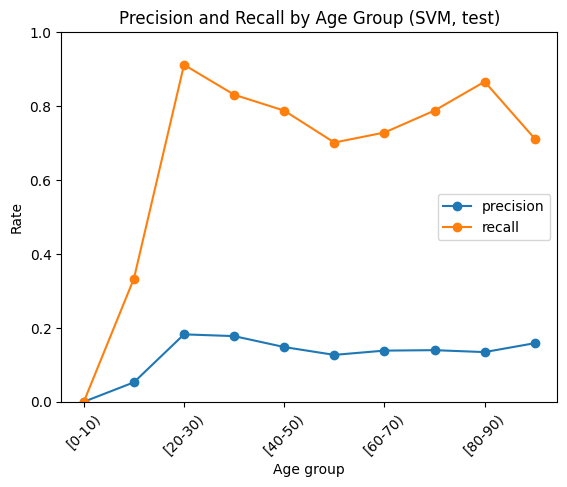

In [56]:
#  chart: same metrics by age band

# Chart 1: x=age_band, y=precision and recall (two lines or grouped bars)

import matplotlib.pyplot as plt

plot_df = age_metrics_svm.sort_values("age_band").set_index("age_band")

ax = plot_df[["precision", "recall"]].plot(marker="o")  # two lines
plt.title("Precision and Recall by Age Group (SVM, test)")
plt.xlabel("Age group")
plt.ylabel("Rate")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [ ]:
# INTERPRETATIONS

# To answer the question "If we apply the same SVM threshold to every age group, does performance stay similar?", we can look at the table above.
        # For threshold-based metrics (precision, recall, flag rate), it depends on t_svm.
        # For ranking metrics (ROC-AUC, PR-AUC), it does not depend on the chosen threshold. 

# The test set is dominated by older groups. The youngest groups have small n values, so the metrics will be noisy. For instance, 
    # 0-10 has 0 positives, so ROC-AUC and PR-AUC cannot be computed. 
    # 10-20 has small n and small positives

# We have low precision everywhere, and it ranges rougly from 0.13-0.18 for the larger groups. Most alerts are false positive, 
    # Class imbalance explains why precision is low overall, but threshold choice controls how many you flag, 
    # which directly affects precision/recall/flag_rate.

# Recall varies by the age groups, thus is not equally sensitive across ages under t_svm.
    # It is very high in [20-30] (0.91) and [80-90] (0.87)
    # It is lower in [50-60] (0.7) and [60-70] (0.73)

# Flag rate varies a lot by age, up to about 77%, meaning operational burden is not uniform across subgroups.
    # Extremely low in [0–10) (0.03), but that band is tiny and has zero positives
    # It is low-ish in [50–60) (0.47) and [30–40) / [40–50) (~0.54–0.56)
	# High in [60–70) (0.61), [70–80) (0.69), [80–90) (0.77)
        # The older groups are getting flagged moer frequently, and can be because of their feature patterns increasing the predicted risk, their base rates differ, etc.

# PR-AUC is the highest for [20-30] and then drops towards older bands, in the range of about 0.17-0.28.
    # This vary may be because of the base rate effect, pos_rate (being sensitive to the positive rate), and/or the model ranks better in some bands than others.

# The plots visualize the same patterns: recall fluctuates across age bands, precision stays low, and PR-AUC declines with age.

# For deployment, the model may over-flag older patients to maintain recall, while providing more targeted risk stratification for younger adults.
# This motivates: 
    # age-aware calibration/thresholding
    # choosing a threshold based on operational capacity and then checking subgroup impacts.
